# 1. Empirisches Projekt
---
### **Skript zur Regressions Analyse**
Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Simple oder eine Mutiple Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!


> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.
>
> Gerne bitte ich auch eine Sprechstunde neben den Vorlesungen wo wir uns einmal wöchentlich treffen und Ihr mir direkt Fragen stellt könnte.


Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

# Google Colab:
---
##### 1. [Python Programmierung mit Google Colab link](https://colab.research.google.com/drive/1_LOqSLE3ogQIeh5_ho03JoLbuJAGTnwF)

<img src="Pictures_for_Explanation/1_Google_Colab_Starten.png" alt="Bildbeschreibung" width="700"/>



##### 2. Um ein Skript zu öffnen Navigiert auf Datei was oben Rechts vorzufinden ist und klickt "Notebook öffnen"

<img src="Pictures_for_Explanation/2_Datei_Optionen_öffnen.png" alt="Bildbeschreibung" width="700"/>

##### 3. Danach geht ihr  auf Github und fügt folgenden Link hinzu https://github.com/RiccardoDAndrea/Python-Crashkurs

<img src="Pictures_for_Explanation/3_Zuletzt_Geöffnet.png" alt="Bildbeschreibung" width="700"/>

##### 4. Nachdem Laden werdet ihr mehere Datein wie Skripte vorfinden.
<img src="Pictures_for_Explanation/4_Github_URL_eingeben.png" alt="Bildbeschreibung" width="700"/>

##### 5. Für die Mutiple Lineare Regression wählt ihr Python_MLR.ipynb und somit habt ihr erfolgreich das Skript zur bearbeitung eingeladen
<img src="Pictures_for_Explanation/5_Python_MLR.png" alt="Bildbeschreibung" width="700"/>


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(filepath_or_buffer= "https://raw.githubusercontent.com/RiccardoDAndrea/Python-Crashkurs/refs/heads/main/Data/wage.csv", 
                 sep="\t")

In [8]:
df.head()

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1


In [9]:
X = df[["educ", "exper", "metro"]] 
y = df["wage"]

In [10]:
X = sm.add_constant(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   const   998 non-null    float64
 1   educ    998 non-null    int64  
 2   exper   998 non-null    int64  
 3   metro   998 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 31.3 KB


In [11]:
model_stats = sm.OLS(y, X)
model = model_stats.fit()
print(model)

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.06e-66
Time:                        09:49:14   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8581      1.077     -9.154      0.0

### 2. Möglichkeit die mehr an R erinnert
---

In [13]:
model = ols('wage ~ educ + exper + metro', 
                   data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.06e-66
Time:                        09:49:14   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.8581      1.077     -9.154      0.0

### Evaluierung des Models:

In [15]:
prediction = model.predict(X)

# Die ersten 5 Vohersagen, um alle zu sehen entferne die [:5]
prediction[:5]

0     7.366383
1    11.082949
2    14.020664
3     9.622870
4     8.200363
dtype: float64

In [16]:
Intercept = model.params[0]
educ_1 = model.params[1]
exper_2 = model.params[2]
metro_3 = model.params[3]

print("Intercept: ", Intercept)
print("educ: ", educ_1)
print("exper: ", exper_2)
print("metro: ", metro_3)

Intercept:  -9.858056885638929
educ:  1.2321830326769871
exper:  0.1327344991515764
metro:  1.5091022459527108


In [17]:
# Regressionsformel als String formatieren
formula = f'wage = {Intercept:.3f} + {educ_1:.3f}*educ + {exper_2:.3f}*exper + {metro_3:.3f}*metro'
print(formula)

wage = -9.858 + 1.232*educ + 0.133*exper + 1.509*metro


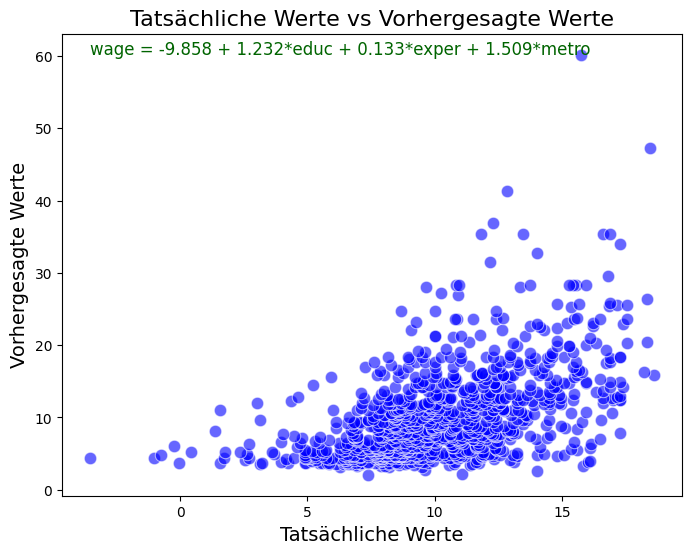

In [18]:
# Scatterplot erstellen (Farben und Transparenz anpassen)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=prediction, y=y, alpha=0.6, color="blue", edgecolor="w", s=80)  # s=80 macht die Punkte größer

# Plot-Titel und Achsenbeschriftungen
plt.title("Tatsächliche Werte vs Vorhergesagte Werte", fontsize=16)
plt.xlabel("Tatsächliche Werte", fontsize=14)
plt.ylabel("Vorhergesagte Werte", fontsize=14)

# Die Regressionsformel in die Grafik einfügen
plt.text(x=min(prediction), y=max(y), s=formula, fontsize=12, color='darkgreen', ha='left')

# Plot anzeigen und speichern

plt.savefig("MLR_Output/Title_Actual_vs_Predicted_with_formula.png", dpi=300)
plt.show()
